# Метод золотого сечения и метод сопряженных градиентов

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Одномерная оптимизация. Метод золотого сечения

**Задача 17.61.** Методом золотого сечения найти точку минимума $x^*$ функции $f(x) = (x + 1)^4 - 2x^2$ на отрезке $x \in [-3, -2]$ с точностью $\varepsilon = 0,05$.

In [2]:
def f(x):
    return (x + 1) ** 4 - 2 * x ** 2

Метод золотого сечения (Golden Section Search) – метод оптимизации, базирующийся на принципе разделения интервала поиска на две части в заранее определенной пропорции, известной как «золотое сечение»

Алгоритм:

Пока длина интервала не становится меньше заранее установленного порогового значения $\varepsilon = \frac{b-a}{2}$:
1. Вычисляем промежуточные точки внутри интервала: $c = g_1(b - a) + a$ и $d = g_2(b - a) + a$
2. Выбираем одна из них в соответствии с условием: если $f(c) \leq f(d)$, то $b = d$, иначе $a = c$

$x^* = \frac{a+b}{2}$

In [3]:
def golden_section(a, b, epsilon):

    # константы «золотого сечения»
    const_1 = (3 - np.sqrt(5)) / 2
    const_2 = (np.sqrt(5) - 1) / 2
    
    iterations = 0 # количество итераций
    steps = [(a, b)] # интервалы на каждом шаге
    
    #метод золотого сечения
    while (b - a) / 2 > epsilon:
        iterations += 1
        c = const_1 * (b - a) + a
        d = const_2 * (b - a) + a

        if f(c) <= f(d):
            b = d
        elif f(c) > f(d): 
            a = c
        
        steps.append((a, b))
    
    # точка минимума
    xmin = (a + b) / 2
    
    return xmin, iterations, steps

Найдём точку минимума $x^*$ и минимальное значение $f^*$ исходной функции на отрезке $x \in [-3, -2]$ с точностью $\varepsilon = 0.05$, а также найдём количество шагов $k$

In [4]:
xmin, iterations, steps = golden_section(-3, -2, 0.05)
print('x* =', xmin)
print('f* =', f(xmin))
print('k =', iterations)

x* = -2.3368810393753683
f* = -7.727760156787211
k = 5


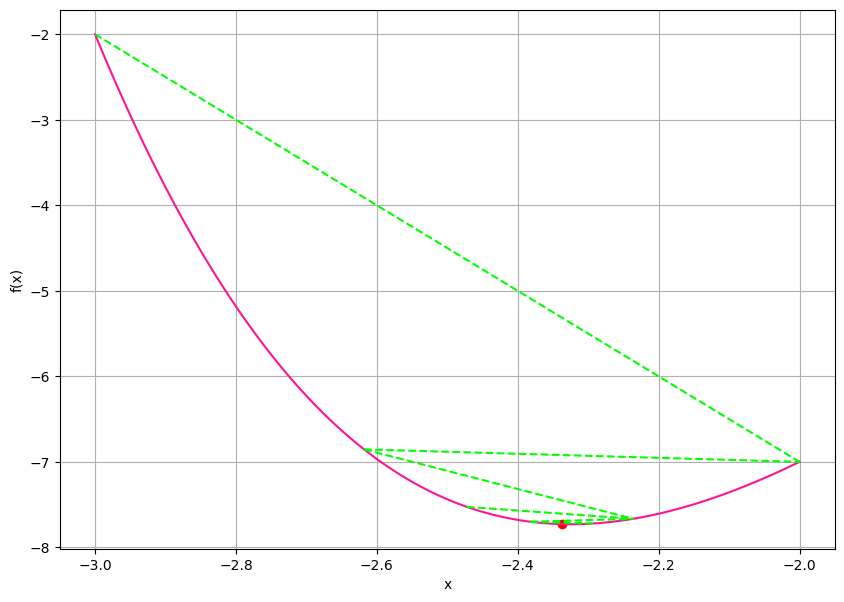

In [5]:
x = np.linspace(-3, -2, 100)
y = f(x)

plt.figure(figsize=(10, 7))
plt.plot(x, y, color = 'DeepPink')
plt.scatter([xmin], [f(xmin)], marker='o', color = 'red')

for step in steps:
    a, b = step
    plt.plot([a, b], [f(a), f(b)], color = 'lime', linestyle='--')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

Попробуем уменьшить $\varepsilon$:

In [6]:
a = -3
b = -2
epsilon = 0.05

for i in range(4):
    xmin, iterations, steps = golden_section(a, b, epsilon/(10 ** i))
    print('\nepsilon = ', epsilon/(10 ** i))
    print('x* =', xmin)
    print('f* =', f(xmin))
    print('k =', iterations)


epsilon =  0.05
x* = -2.3368810393753683
f* = -7.727760156787211
k = 5

epsilon =  0.005
x* = -2.3252782318865144
f* = -7.729028859646844
k = 10

epsilon =  0.0005
x* = -2.324685111241693
f* = -7.729031528779235
k = 15

epsilon =  5e-05
x* = -2.324697736547865
f* = -7.729031534493558
k = 20


Можем заметить, что при уменьшении $\varepsilon$, количество итераций увеличивается на одинаковое количество шагов, то есть сходимость линейная

## 2. Многомерная оптимизация (безусловная). Метод сопряженных градиентов

**Задача 17.156.** Методом сопряжённых градиентов минимизировать функцию $f(x) = 2x_1^2 + 3x_2^2 - 2\sin{\frac{x_1 - x_2}{2}} + x_2$

In [7]:
def function(x, y):
    return 2 * x ** 2 + 3 * y ** 2 - 2 * np.sin((x - y) / 2) + y

$\nabla f(x) = (4x_1 - \cos{\frac{x_1 - x_2}{2}}, 6x_2 + \cos{\frac{x_1 - x_2}{2}} + 1)$

In [8]:
def Gradient(x, y):
    return np.array([4 * x - np.cos((x - y) / 2), 6 * y + np.cos((x - y) / 2) + 1])

### Поиск $\alpha$ с помощью метода золотого сечения

In [9]:
# функция, зависящая от alpha
def f(x0, y0, hx0, hy0, a):
    return 2 * (x0 + a * hx0) ** 2 + 3 * (y0 + a * hy0) ** 2 - 2 * np.sin(((x0 + a * hx0) - (y0 + a * hy0)) / 2) + (y0 + a * hy0)

# функция для поиска alpha, зависящая от парам☼тра
def ff(a):
    return f(x0, y0, hx0, hy0, a)

In [10]:
# поиск alpha с помошью метода золотого сечения
def Search_Alpha(a, b):
    
    const_1 = (3 - np.sqrt(5)) / 2
    const_2 = (np.sqrt(5) - 1) / 2
    
    while (b - a) / 2 > epsilon:
        c = const_1 * (b - a) + a
        d = const_2 * (b - a) + a

        if ff(c) <= ff(d):
            b = d
        elif ff(c) > ff(d): 
            a = c
    
    alpha = (a + b) / 2
    
    return alpha

## Метод сопряженных градиентов

Задаём $ x^0 $, $ h_0 = -f'(x^0) $

**1) Если $ k + 1 $ кратно количеству переменных**, то: 

$$ \alpha_k = arg\min_{\alpha}f(x^k + \alpha h_k) $$

$x^{k+1} = x^k + \alpha_kh_k$

$ h_{k+1} = -f'(x^{k+1}) $

**2) Иначе**:
$$ \alpha_k = arg\min_{\alpha}f(x^k + \alpha h_k) $$

$x^{k+1} = x^k + \alpha_kh_k$

$ \beta_k = \frac{\parallel f'(x^{k+1}) \parallel ^2}{\parallel f'(x^k) \parallel ^2} $


$ h_{k+1} = -f'(x_{k+1}) + \beta_kh_k $

**3) Проверка критической остановки**: $ \parallel f'(x^{k+1}) \parallel < 10^{-3} $. 

Если условие выполнено, то конец. 

Если условие не выполнено, то $ k = k + 1 $ и повторяем пункт 1) или 2).

In [11]:
x0, y0 = 4, 4 # задём начальную точку
hx0, hy0 = -Gradient(x0, y0) # антиградиент
k = 0 # количество итераций 
steps = [] # сюда записываем координаты шагов
steps.append([x0, y0])

# пока не выполнилось условие остановки
while np.sqrt(Gradient(x0, y0)[0] ** 2 + Gradient(x0, y0)[1] ** 2) > 0.0001:

    k += 1

    # если  k+1 кратно количеству переменных, то
    if k % 2 == 0:

        alpha = Search_Alpha(a = 0, b = 1) # ищем оптимальное alpha

        # вычисляем x_k+1 = x_k + alpha_k * h_k
        x1 = x0 + alpha * hx0
        y1 = y0 + alpha * hy0

        # вычисляем антиградиент в новой точке
        hx1 = -Gradient(x1, y1)[0]
        hy1 = -Gradient(x1, y1)[1]

    # иначе
    else:
        alpha = Search_Alpha(a = 0, b = 1) # ищем оптимальное alpha

        # вычисляем x_k+1 = x_k + alpha_k * h_k
        x1 = x0 + alpha * hx0
        y1 = y0 + alpha * hy0

        # вычисляем beta
        beta_numerator = Gradient(x1, y1)[0] ** 2 + Gradient(x1, y1)[1] ** 2 # числитель beta
        beta_denominator = Gradient(x0, y0)[0] ** 2 + Gradient(x0, y0)[1] ** 2 # знаменатель beta
        beta = beta_numerator / beta_denominator

        # вычисляем антиградиент в новой точке
        hx1 = -Gradient(x1, y1)[0] + hx0 * beta
        hy1 = -Gradient(x1, y1)[1] + hy0 * beta

    # добавляем координаты нового шага
    x0 = x1
    y0 = y1
    steps.append([x0, y0])

    # обновляем hx0 и hy0 для новой итерации
    hx0 = hx1
    hy0 = hy1

In [12]:
print('x* =', (x0, y0))
print('f* =', function(x0, y0))
print('k =', k)

x* = (0.24003335406599863, -0.3266884687386432)
f* = -0.4504485874834854
k = 6


### Нарисуем графики

In [13]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = function(x, y)

Text(0.5, 0.5, 'x2')

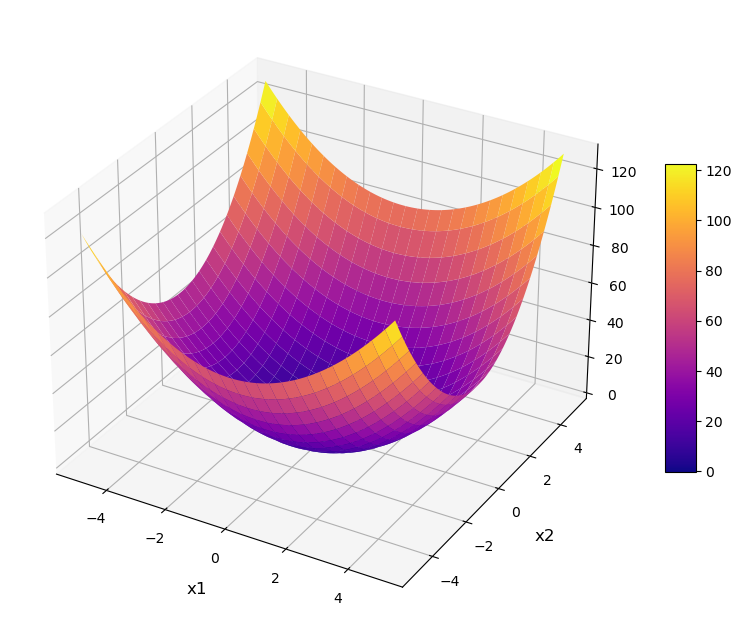

In [14]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
a = ax.plot_surface(x, y, z, rstride=4, cstride=4, cmap='plasma')
fig.colorbar(a, ax = ax, shrink = 0.5, aspect = 10) 
ax.set_xlabel('x1', fontsize = 12, labelpad=10)
ax.set_ylabel('x2', fontsize = 12, labelpad=10)

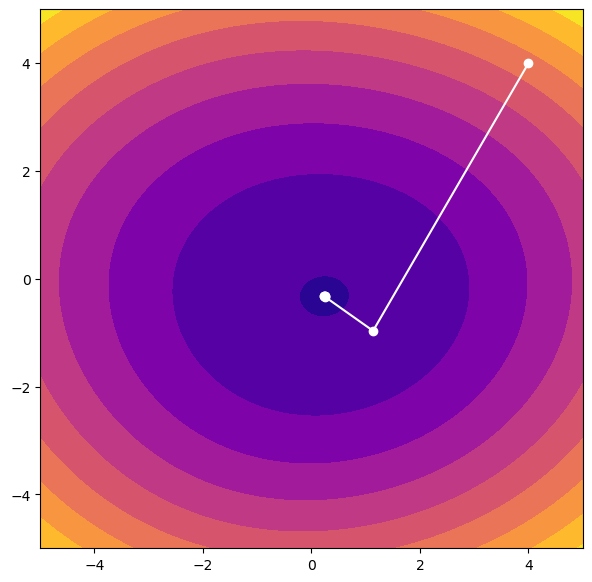

In [15]:
plt.figure(figsize=(7, 7))
plt.contourf(x, y, z, 11, cmap='plasma')

if steps is not None:
    steps = np.matrix(steps)
    plt.plot(steps[:,0], steps[:,1], '-o', color='white')